In [1]:
import pip
pip.main(["install","twitter"])
pip.main(["install","textblob"])
from textblob import TextBlob
import nltk
import numpy as np
import pandas as pd
import json
import twitter
from twitter import Twitter 
from twitter import OAuth 
from twitter import TwitterHTTPError 
from twitter import TwitterStream
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt
from collections import Counter

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
ACCESS_TOKEN = '3151548164-KGXKM6vZipCfBfIA16bUxBaNhIcg7CmfiYb6iWU'
ACCESS_SECRET = '8qKGbi5JRnrZb3yKcKijbYxVHVZ4lFonuQDsN3dWonzao'
consumer_key = 'nqn05e7YWcj57FBzJhu2vJpQU'
consumer_secret = 'a3Y1S2DXVkbRoGaO3NMgstbGm4LSAyRnKSeShseZFrFqWmTwJo'
oauth = OAuth(ACCESS_TOKEN, ACCESS_SECRET, consumer_key, consumer_secret)
twitter = Twitter(auth=oauth)

In [4]:
# Search for a term
# Normalize the results into pandas table.
# Take the tweet messages in the "text" column (row by row) and break it into words
search_results = twitter.search.tweets(q = 'SuperBowl', count = 250)
statuses = search_results['statuses']
df = json_normalize(search_results, 'statuses')
status_texts = df["text"]
status_texts

0                    @282TY @096RW boa noite, superbowl
1     RT @tommiesunshine: the year @Prince won the @...
2     @JamesWalkerNFL Oops...he did cost the #Bengal...
3     @realDonaldTrump @SuperBowl @Patriots wish the...
4     RT @itsjoelpimentel: ¿ Quién está viendo el #S...
5     RT @realDonaldTrump: A great honor to host the...
6     When dad grabbed this when the @steelers won t...
7     RT @realDonaldTrump: A great honor to host the...
8     @patriciaMraz @Scavino45 @POTUS @realDonaldTru...
9     @WalterTippie @cdoyle222 @Scavino45 @POTUS @re...
10    New England #Patriots #Player #Collage Case fo...
11    @LouFlynn_ted9 @Lanejohnson65 I love this 👍 I ...
12    Im a Cycling HOUSEKEEPER and I Love Cycling, O...
13    My fav #TheFive Moment, was @RobertGBeckel's r...
14    @cdoyle222 @Scavino45 @POTUS @realDonaldTrump ...
15    @HoustonTexans You need to fire GM,Owner,same ...
16    RT @tommiesunshine: the year @Prince won the @...
17    @patriciaMraz @Jali_Benz @staab_teresa @Sc

In [5]:
# Loop through each row run the sentiment analysis on each sentence
polarity = []
subjectivity = []
for sen in status_texts:
    polarity.append(TextBlob(sen).sentiment.polarity)
    subjectivity.append(TextBlob(sen).sentiment.subjectivity)

In [6]:
# Store the polarity and subjectivity into another data table
df_final = pd.DataFrame({'Polarity' : polarity, 'Subjectivity' : subjectivity})
df_final

,Polarity,Subjectivity
0,0.000000,0.000000
1,0.000000,0.000000
2,-0.400000,0.900000
3,0.000000,0.125000
4,0.000000,0.000000
5,0.312121,0.401515
6,0.800000,0.700000
7,0.312121,0.401515
8,0.000000,0.000000
9,0.900000,0.725000


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

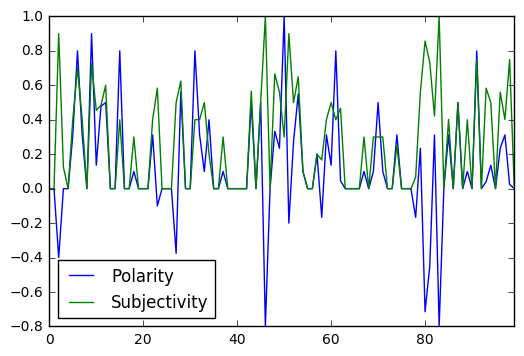

In [8]:
# Plot polarity and subjectivity
df_final[['Polarity','Subjectivity']].plot()